<a href="https://colab.research.google.com/github/SaraElizabethGarciaCajero/Proyecto-ASE-I/blob/main/S_ASE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Natalidad_02.xlsx to Natalidad_02.xlsx


In [ ]:
df=pd.read_excel("Natalidad_02.xlsx", header=0)
df

,Entidad federativa de residencia habitual de la madre,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Estados Unidos Mexicanos,18.8,19.2,19.4,19.4,19.2,18.2,17.8,17.9,17.5,17.0,15.1,15.3
1,Aguascalientes,18.4,18.9,18.9,18.8,19.8,17.8,17.3,18.2,18.4,17.2,15.5,16.0
2,Baja California,20.3,20.6,20.0,19.8,20.0,18.9,18.8,18.9,18.0,17.3,13.3,13.3
3,Baja California Sur,19.7,19.1,18.7,17.9,18.1,16.7,16.5,16.2,15.5,13.9,12.8,13.2
4,Campeche,20.2,21.0,19.9,20.1,20.2,19.4,18.6,18.0,17.6,16.8,13.1,13.6
5,Coahuila de Zaragoza,21.8,22.7,23.1,23.1,22.6,22.0,21.7,20.8,20.5,19.0,17.2,16.6
6,Colima,19.6,18.8,19.2,19.1,19.0,17.2,16.5,16.6,16.8,15.3,14.9,13.6
7,Chiapas,18.8,19.5,19.9,20.1,20.1,18.4,18.7,18.3,18.2,18.8,17.1,17.4
8,Chihuahua,23.0,23.2,23.0,22.3,22.5,21.4,20.9,21.4,20.4,19.8,17.6,18.2
9,Ciudad de México,16.5,16.6,16.6,16.4,15.8,14.4,13.9,13.5,12.9,12.3,9.7,10.6


In [ ]:
#Elimino datos NaN
df.drop(df.index[33:44], inplace=True)
df

,Entidad federativa de residencia habitual de la madre,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Estados Unidos Mexicanos,18.8,19.2,19.4,19.4,19.2,18.2,17.8,17.9,17.5,17.0,15.1,15.3
1,Aguascalientes,18.4,18.9,18.9,18.8,19.8,17.8,17.3,18.2,18.4,17.2,15.5,16.0
2,Baja California,20.3,20.6,20.0,19.8,20.0,18.9,18.8,18.9,18.0,17.3,13.3,13.3
3,Baja California Sur,19.7,19.1,18.7,17.9,18.1,16.7,16.5,16.2,15.5,13.9,12.8,13.2
4,Campeche,20.2,21.0,19.9,20.1,20.2,19.4,18.6,18.0,17.6,16.8,13.1,13.6
5,Coahuila de Zaragoza,21.8,22.7,23.1,23.1,22.6,22.0,21.7,20.8,20.5,19.0,17.2,16.6
6,Colima,19.6,18.8,19.2,19.1,19.0,17.2,16.5,16.6,16.8,15.3,14.9,13.6
7,Chiapas,18.8,19.5,19.9,20.1,20.1,18.4,18.7,18.3,18.2,18.8,17.1,17.4
8,Chihuahua,23.0,23.2,23.0,22.3,22.5,21.4,20.9,21.4,20.4,19.8,17.6,18.2
9,Ciudad de México,16.5,16.6,16.6,16.4,15.8,14.4,13.9,13.5,12.9,12.3,9.7,10.6


In [ ]:
df_relacionado= df.drop(df.index[0])
df_relacionado

,Entidad federativa de residencia habitual de la madre,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Aguascalientes,18.4,18.9,18.9,18.8,19.8,17.8,17.3,18.2,18.4,17.2,15.5,16.0
2,Baja California,20.3,20.6,20.0,19.8,20.0,18.9,18.8,18.9,18.0,17.3,13.3,13.3
3,Baja California Sur,19.7,19.1,18.7,17.9,18.1,16.7,16.5,16.2,15.5,13.9,12.8,13.2
4,Campeche,20.2,21.0,19.9,20.1,20.2,19.4,18.6,18.0,17.6,16.8,13.1,13.6
5,Coahuila de Zaragoza,21.8,22.7,23.1,23.1,22.6,22.0,21.7,20.8,20.5,19.0,17.2,16.6
6,Colima,19.6,18.8,19.2,19.1,19.0,17.2,16.5,16.6,16.8,15.3,14.9,13.6
7,Chiapas,18.8,19.5,19.9,20.1,20.1,18.4,18.7,18.3,18.2,18.8,17.1,17.4
8,Chihuahua,23.0,23.2,23.0,22.3,22.5,21.4,20.9,21.4,20.4,19.8,17.6,18.2
9,Ciudad de México,16.5,16.6,16.6,16.4,15.8,14.4,13.9,13.5,12.9,12.3,9.7,10.6
10,Durango,21.4,21.6,21.9,21.6,21.1,21.0,20.4,20.2,19.8,18.6,17.2,17.6


In [ ]:
df_P=df_relacionado[['Entidad federativa de residencia habitual de la madre', '2010', '2012','2014', '2016', '2018', '2020']]
df_P

,Entidad federativa de residencia habitual de la madre,2010,2012,2014,2016,2018,2020
1,Aguascalientes,18.4,18.9,19.8,17.3,18.4,15.5
2,Baja California,20.3,20.0,20.0,18.8,18.0,13.3
3,Baja California Sur,19.7,18.7,18.1,16.5,15.5,12.8
4,Campeche,20.2,19.9,20.2,18.6,17.6,13.1
5,Coahuila de Zaragoza,21.8,23.1,22.6,21.7,20.5,17.2
6,Colima,19.6,19.2,19.0,16.5,16.8,14.9
7,Chiapas,18.8,19.9,20.1,18.7,18.2,17.1
8,Chihuahua,23.0,23.0,22.5,20.9,20.4,17.6
9,Ciudad de México,16.5,16.6,15.8,13.9,12.9,9.7
10,Durango,21.4,21.9,21.1,20.4,19.8,17.2


In [ ]:
df_P.rename({'2010': '% de embarazos adolescentes del 2010', 
             '2012': '% de embarazos adolescentes del 2012', 
             '2014': '% de embarazos adolescentes del 2014', 
             '2016': '% de embarazos adolescentes del 2016',
             '2018': '% de embarazos adolescentes del 2018',
             '2020': '% de embarazos adolescentes del 2020'}, axis=1, inplace=True)
df_P

<ipython-input-60-72df2faa6024>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P.rename({'2010': '% de embarazos adolescentes del 2010',


,Entidad federativa de residencia habitual de la madre,% de embarazos adolescentes del 2010,% de embarazos adolescentes del 2012,% de embarazos adolescentes del 2014,% de embarazos adolescentes del 2016,% de embarazos adolescentes del 2018,% de embarazos adolescentes del 2020
1,Aguascalientes,18.4,18.9,19.8,17.3,18.4,15.5
2,Baja California,20.3,20.0,20.0,18.8,18.0,13.3
3,Baja California Sur,19.7,18.7,18.1,16.5,15.5,12.8
4,Campeche,20.2,19.9,20.2,18.6,17.6,13.1
5,Coahuila de Zaragoza,21.8,23.1,22.6,21.7,20.5,17.2
6,Colima,19.6,19.2,19.0,16.5,16.8,14.9
7,Chiapas,18.8,19.9,20.1,18.7,18.2,17.1
8,Chihuahua,23.0,23.0,22.5,20.9,20.4,17.6
9,Ciudad de México,16.5,16.6,15.8,13.9,12.9,9.7
10,Durango,21.4,21.9,21.1,20.4,19.8,17.2


In [ ]:
#Determino el máximo de todos mis datos por año
df.max()

Entidad federativa de residencia habitual de la madre    Zacatecas
2010                                                          23.0
2011                                                          23.2
2012                                                          23.1
2013                                                          23.1
2014                                                          22.6
2015                                                          22.0
2016                                                          21.7
2017                                                          21.4
2018                                                          20.5
2019                                                          19.8
2020                                                          18.2
2021                                                          18.2
dtype: object

In [ ]:
from pandas.io.formats import style
df.style.highlight_max(color='deeppink')
#Este es un formato simplificado con el que los valores con los que trabajamos hacen sentido

,Entidad federativa de residencia habitual de la madre,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Estados Unidos Mexicanos,18.800000,19.200000,19.400000,19.400000,19.200000,18.200000,17.800000,17.900000,17.500000,17.000000,15.100000,15.300000
1,Aguascalientes,18.400000,18.900000,18.900000,18.800000,19.800000,17.800000,17.300000,18.200000,18.400000,17.200000,15.500000,16.000000
2,Baja California,20.300000,20.600000,20.000000,19.800000,20.000000,18.900000,18.800000,18.900000,18.000000,17.300000,13.300000,13.300000
3,Baja California Sur,19.700000,19.100000,18.700000,17.900000,18.100000,16.700000,16.500000,16.200000,15.500000,13.900000,12.800000,13.200000
4,Campeche,20.200000,21.000000,19.900000,20.100000,20.200000,19.400000,18.600000,18.000000,17.600000,16.800000,13.100000,13.600000
5,Coahuila de Zaragoza,21.800000,22.700000,23.100000,23.100000,22.600000,22.000000,21.700000,20.800000,20.500000,19.000000,17.200000,16.600000
6,Colima,19.600000,18.800000,19.200000,19.100000,19.000000,17.200000,16.500000,16.600000,16.800000,15.300000,14.900000,13.600000
7,Chiapas,18.800000,19.500000,19.900000,20.100000,20.100000,18.400000,18.700000,18.300000,18.200000,18.800000,17.100000,17.400000
8,Chihuahua,23.000000,23.200000,23.000000,22.300000,22.500000,21.400000,20.900000,21.400000,20.400000,19.800000,17.600000,18.200000
9,Ciudad de México,16.500000,16.600000,16.600000,16.400000,15.800000,14.400000,13.900000,13.500000,12.900000,12.300000,9.700000,10.600000


In [ ]:
df_2010=df[['Entidad federativa de residencia habitual de la madre', '2010']]
e_2010=df['2010'].max()
es_2010=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo del año 2010 es:", e_2010, "y correspone a la entidad: ", es_2010 )
df_2010

El % máximo del año 2010 es: 23.0 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2010
0,Estados Unidos Mexicanos,18.8
1,Aguascalientes,18.4
2,Baja California,20.3
3,Baja California Sur,19.7
4,Campeche,20.2
5,Coahuila de Zaragoza,21.8
6,Colima,19.6
7,Chiapas,18.8
8,Chihuahua,23.0
9,Ciudad de México,16.5


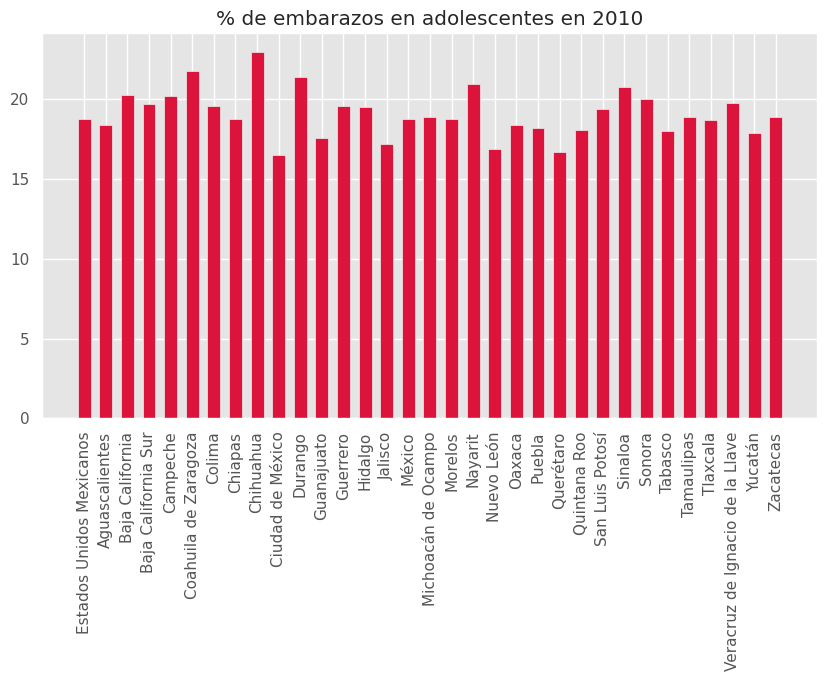

In [ ]:
height= list(df_2010['2010'])
bars = list(df_2010['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='crimson', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2010")
plt.show()

In [ ]:
df_2011=df[['Entidad federativa de residencia habitual de la madre', '2011']]
e_2011=df['2011'].max()
es_2011=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo de este año es:", e_2011, "y correspone a la entidad: ", es_2011 )
df_2011

El % máximo de este año es: 23.2 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2011
0,Estados Unidos Mexicanos,19.2
1,Aguascalientes,18.9
2,Baja California,20.6
3,Baja California Sur,19.1
4,Campeche,21.0
5,Coahuila de Zaragoza,22.7
6,Colima,18.8
7,Chiapas,19.5
8,Chihuahua,23.2
9,Ciudad de México,16.6


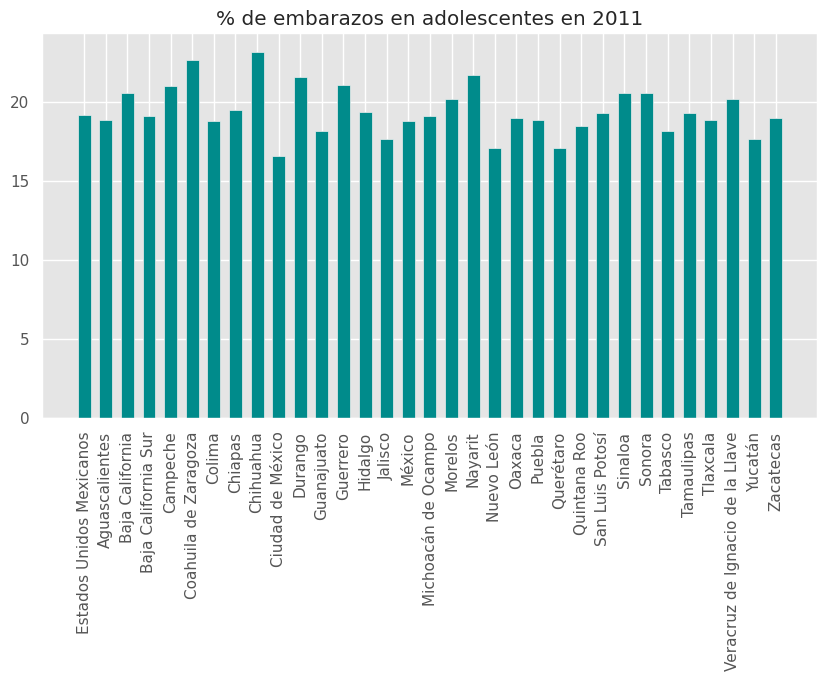

In [ ]:
height= list(df_2011['2011'])
bars = list(df_2011['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='darkcyan', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2011")
plt.show()

In [ ]:
df_2012=df[['Entidad federativa de residencia habitual de la madre', '2012']]
e_2012=df['2012'].max()
es_2012=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2012, "y correspone a la entidad: ", es_2012 )
df_2012

El % máximo de este año es: 23.1 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2012
0,Estados Unidos Mexicanos,19.4
1,Aguascalientes,18.9
2,Baja California,20.0
3,Baja California Sur,18.7
4,Campeche,19.9
5,Coahuila de Zaragoza,23.1
6,Colima,19.2
7,Chiapas,19.9
8,Chihuahua,23.0
9,Ciudad de México,16.6


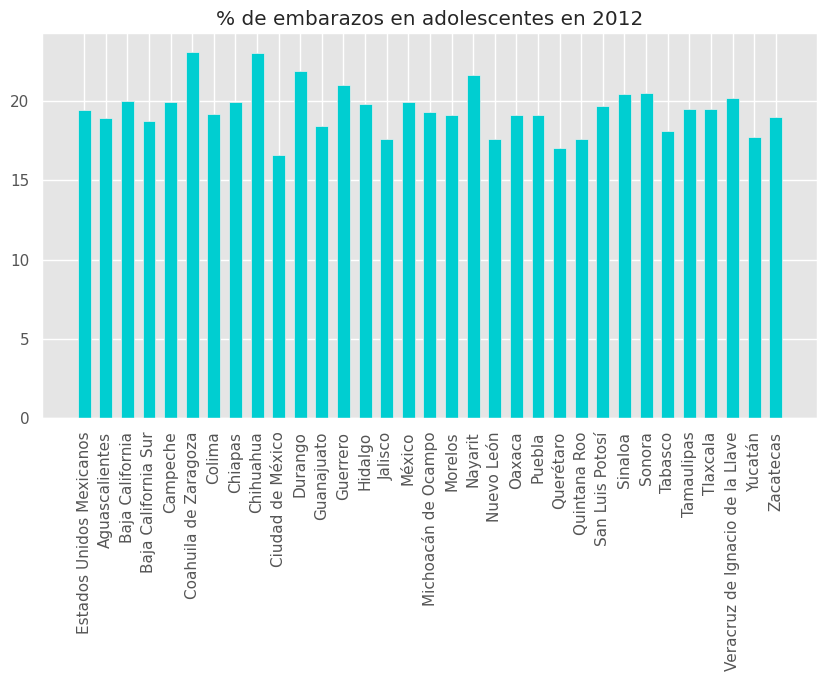

In [ ]:
height= list(df_2012['2012'])
bars = list(df_2012['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='darkturquoise', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2012")
plt.show()

In [ ]:
df_2013=df[['Entidad federativa de residencia habitual de la madre', '2013']]
e_2013=df['2013'].max()
es_2013=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2013, "y correspone a la entidad: ", es_2013 )
df_2013

El % máximo de este año es: 23.1 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2013
0,Estados Unidos Mexicanos,19.4
1,Aguascalientes,18.8
2,Baja California,19.8
3,Baja California Sur,17.9
4,Campeche,20.1
5,Coahuila de Zaragoza,23.1
6,Colima,19.1
7,Chiapas,20.1
8,Chihuahua,22.3
9,Ciudad de México,16.4


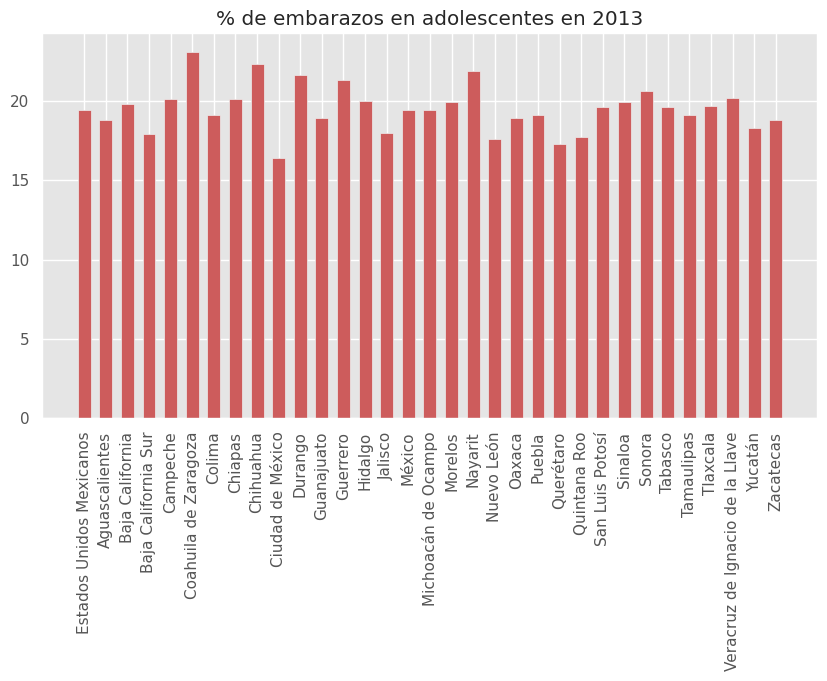

In [ ]:
height= list(df_2013['2013'])
bars = list(df_2013['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='indianred', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2013")
plt.show()

In [ ]:
df_2014=df[['Entidad federativa de residencia habitual de la madre', '2014']]
e_2014=df['2014'].max()
es_2014=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2014, "y correspone a la entidad: ", es_2014)
df_2014

El % máximo de este año es: 22.6 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2014
0,Estados Unidos Mexicanos,19.2
1,Aguascalientes,19.8
2,Baja California,20.0
3,Baja California Sur,18.1
4,Campeche,20.2
5,Coahuila de Zaragoza,22.6
6,Colima,19.0
7,Chiapas,20.1
8,Chihuahua,22.5
9,Ciudad de México,15.8


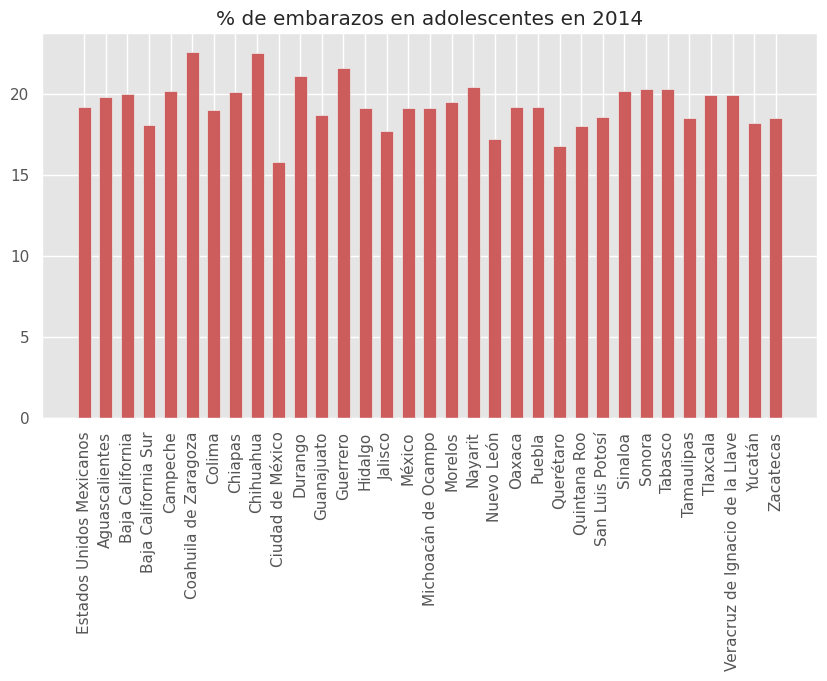

In [ ]:
height= list(df_2014['2014'])
bars = list(df_2014['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='indianred', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2014")
plt.show()

In [ ]:
df_2015=df[['Entidad federativa de residencia habitual de la madre', '2015']]
e_2015=df['2015'].max()
es_2015=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2015, "y correspone a la entidad: ", es_2015)
df_2015

El % máximo de este año es: 22.0 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2015
0,Estados Unidos Mexicanos,18.2
1,Aguascalientes,17.8
2,Baja California,18.9
3,Baja California Sur,16.7
4,Campeche,19.4
5,Coahuila de Zaragoza,22.0
6,Colima,17.2
7,Chiapas,18.4
8,Chihuahua,21.4
9,Ciudad de México,14.4


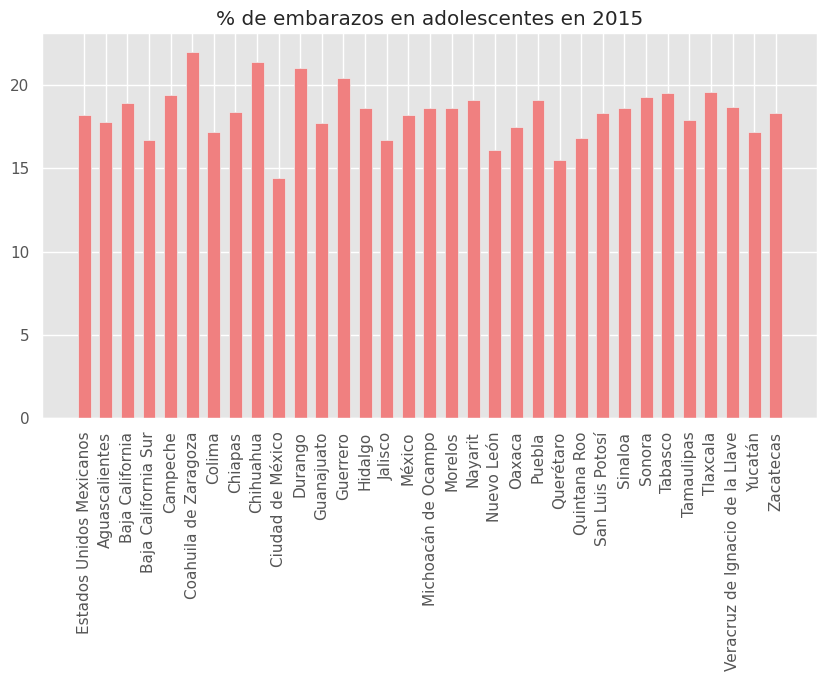

In [ ]:
height= list(df_2015['2015'])
bars = list(df_2015['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='lightcoral', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2015")
plt.show()

In [ ]:
df_2016=df[['Entidad federativa de residencia habitual de la madre', '2016']]
e_2016=df['2016'].max()
es_2016=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2016, "y correspone a la entidad: ", es_2016)
df_2016

El % máximo de este año es: 21.7 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2016
0,Estados Unidos Mexicanos,17.8
1,Aguascalientes,17.3
2,Baja California,18.8
3,Baja California Sur,16.5
4,Campeche,18.6
5,Coahuila de Zaragoza,21.7
6,Colima,16.5
7,Chiapas,18.7
8,Chihuahua,20.9
9,Ciudad de México,13.9


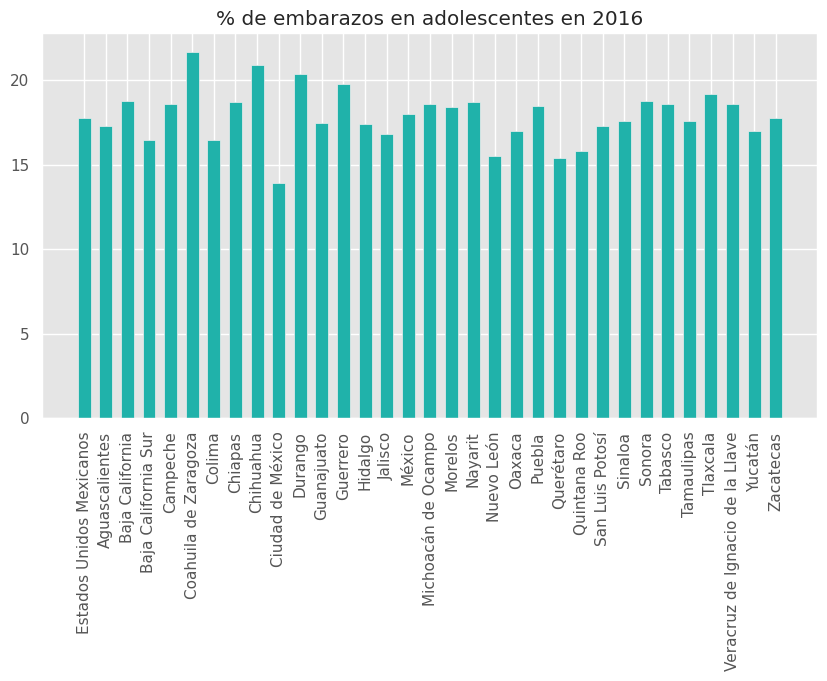

In [ ]:
height= list(df_2016['2016'])
bars = list(df_2016['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='lightseagreen', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2016")
plt.show()

In [ ]:
df_2017=df[['Entidad federativa de residencia habitual de la madre', '2017']]
e_2017=df['2017'].max()
es_2017=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo de este año es:", e_2017, "y correspone a la entidad: ", es_2017)
df_2017

El % máximo de este año es: 21.4 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2017
0,Estados Unidos Mexicanos,17.9
1,Aguascalientes,18.2
2,Baja California,18.9
3,Baja California Sur,16.2
4,Campeche,18.0
5,Coahuila de Zaragoza,20.8
6,Colima,16.6
7,Chiapas,18.3
8,Chihuahua,21.4
9,Ciudad de México,13.5


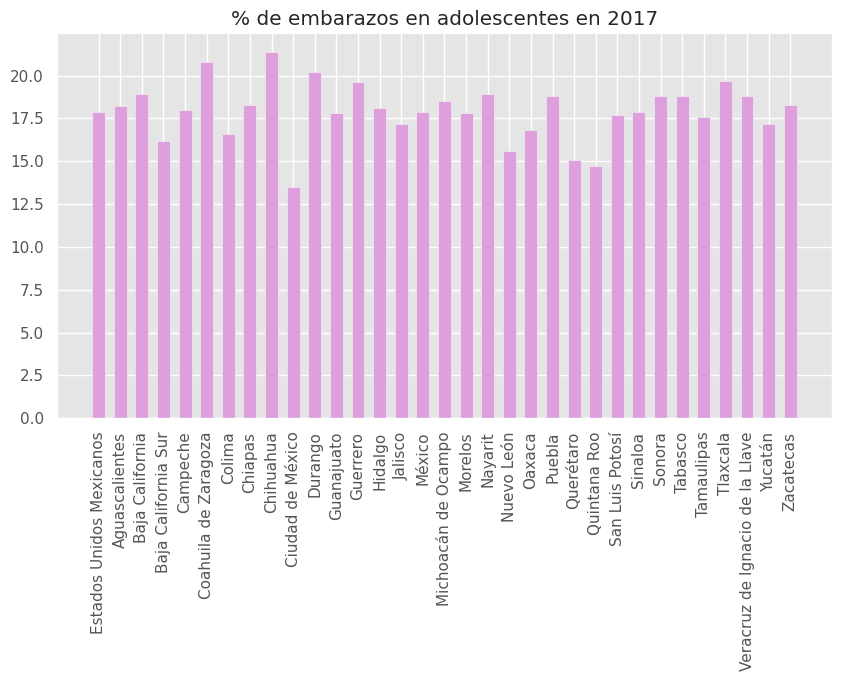

In [ ]:
height= list(df_2017['2017'])
bars = list(df_2017['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='plum', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2017")
plt.show()

In [ ]:
df_2018=df[['Entidad federativa de residencia habitual de la madre', '2018']]
e_2018=df['2018'].max()
es_2018=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2018, "y correspone a la entidad: ", es_2018)
df_2018

El % máximo de este año es: 20.5 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2018
0,Estados Unidos Mexicanos,17.5
1,Aguascalientes,18.4
2,Baja California,18.0
3,Baja California Sur,15.5
4,Campeche,17.6
5,Coahuila de Zaragoza,20.5
6,Colima,16.8
7,Chiapas,18.2
8,Chihuahua,20.4
9,Ciudad de México,12.9


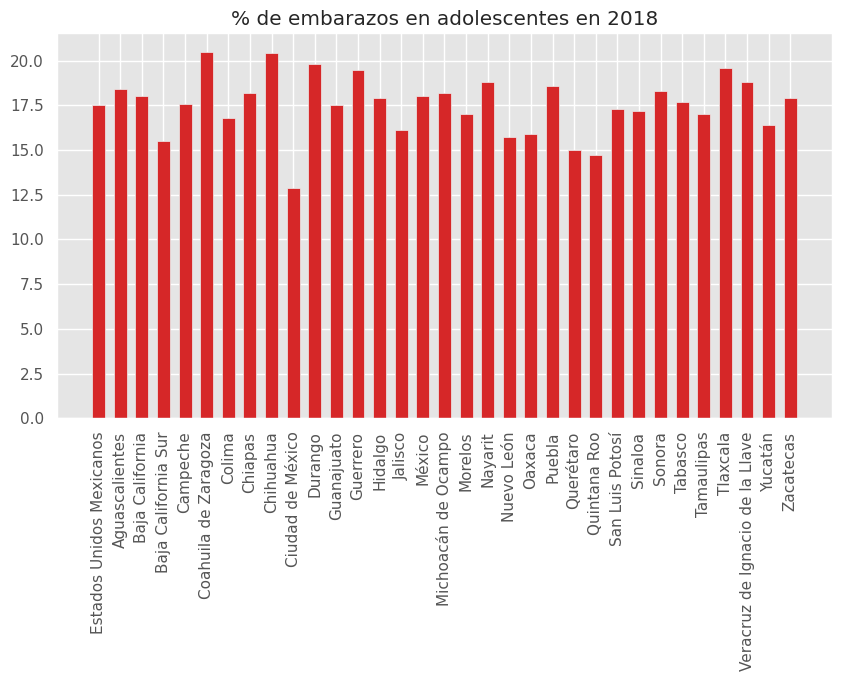

In [ ]:
height= list(df_2018['2018'])
bars = list(df_2018['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='tab:red', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2018")
plt.show()

In [ ]:
df_2019=df[['Entidad federativa de residencia habitual de la madre', '2019']]
e_2019=df['2019'].max()
es_2019=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo de este año es:", e_2019, "y correspone a la entidad: ", es_2019)
df_2019

El % máximo de este año es: 19.8 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2019
0,Estados Unidos Mexicanos,17.0
1,Aguascalientes,17.2
2,Baja California,17.3
3,Baja California Sur,13.9
4,Campeche,16.8
5,Coahuila de Zaragoza,19.0
6,Colima,15.3
7,Chiapas,18.8
8,Chihuahua,19.8
9,Ciudad de México,12.3


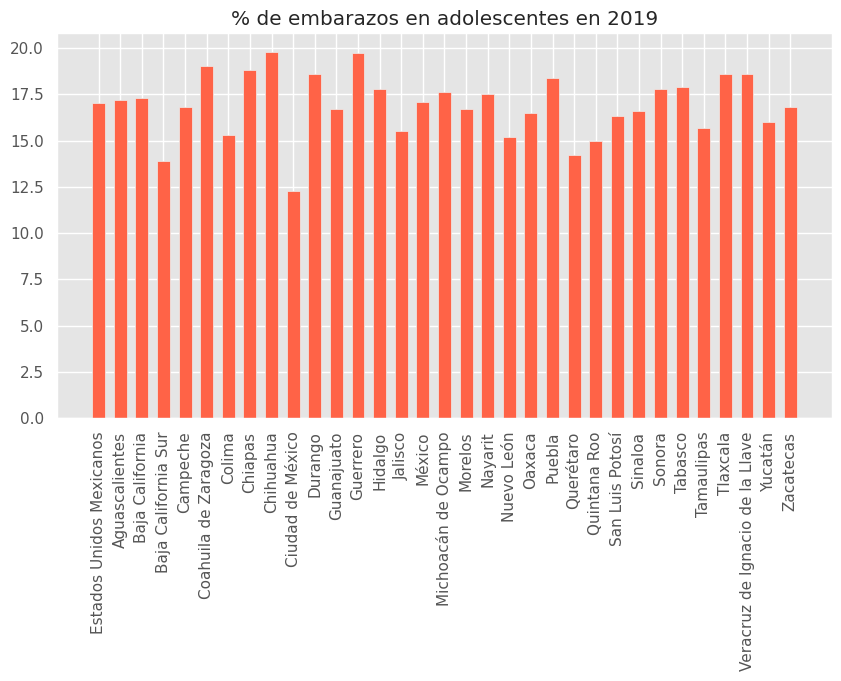

In [ ]:
height= list(df_2019['2019'])
bars = list(df_2019['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='tomato', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2019")
plt.show()

In [ ]:
df_2020=df[['Entidad federativa de residencia habitual de la madre', '2020']]
e_2020=df['2020'].max()
es_2020=df['Entidad federativa de residencia habitual de la madre'].iloc[12]
print("El % máximo de este año es:", e_2020, "y correspone a la entidad: ", es_2020)
df_2020

El % máximo de este año es: 18.2 y correspone a la entidad:  Guerrero


,Entidad federativa de residencia habitual de la madre,2020
0,Estados Unidos Mexicanos,15.1
1,Aguascalientes,15.5
2,Baja California,13.3
3,Baja California Sur,12.8
4,Campeche,13.1
5,Coahuila de Zaragoza,17.2
6,Colima,14.9
7,Chiapas,17.1
8,Chihuahua,17.6
9,Ciudad de México,9.7


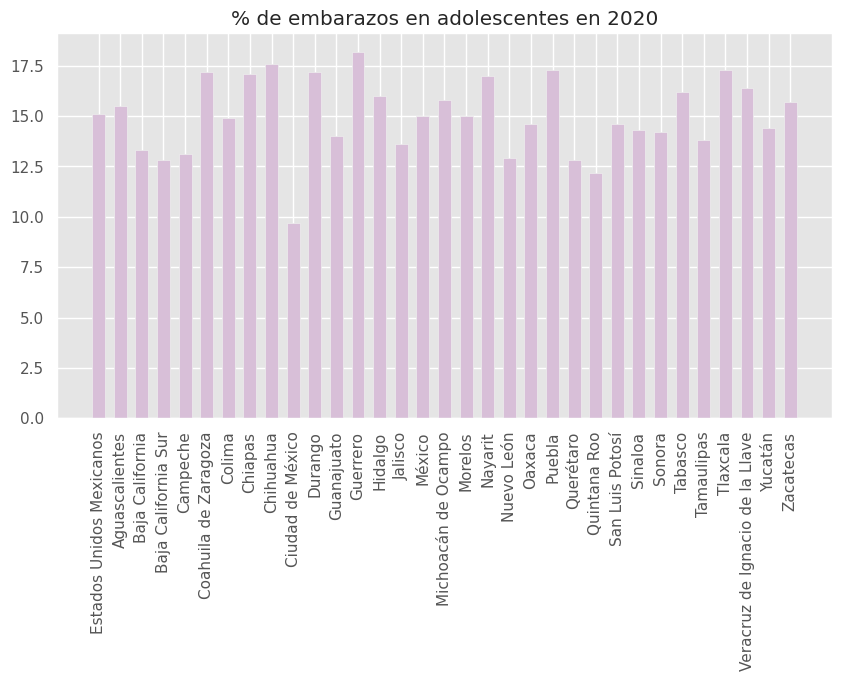

In [ ]:
height= list(df_2020['2020'])
bars = list(df_2012['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='thistle', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2020")
plt.show()

In [ ]:
df_2021=df[['Entidad federativa de residencia habitual de la madre', '2021']]
e_2021=df['2020'].max()
es_2021=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo de este año es:", e_2021, "y correspone a la entidad: ", es_2021)
df_2021

El % máximo de este año es: 18.2 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2021
0,Estados Unidos Mexicanos,15.3
1,Aguascalientes,16.0
2,Baja California,13.3
3,Baja California Sur,13.2
4,Campeche,13.6
5,Coahuila de Zaragoza,16.6
6,Colima,13.6
7,Chiapas,17.4
8,Chihuahua,18.2
9,Ciudad de México,10.6


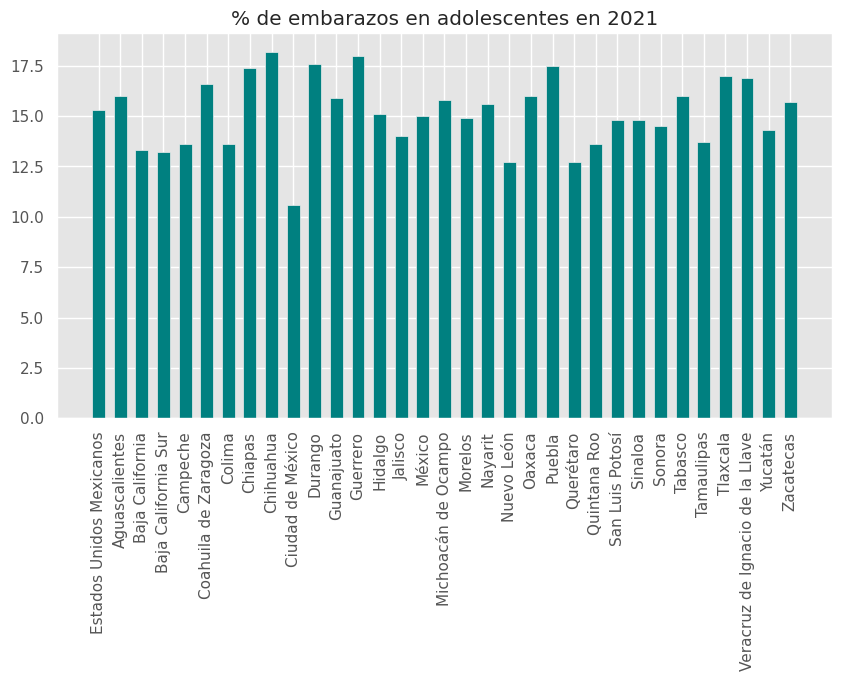

In [ ]:
height= list(df_2021['2021'])
bars = list(df_2021['Entidad federativa de residencia habitual de la madre'])
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(bars, height, color='teal', width=0.6)
plt.xticks(rotation=90)
plt. title("% de embarazos en adolescentes en 2021")
plt.show()

In [ ]:
#VARIABLES A ANALIZAR: Personas Económicamente no activas, pregunta a responder: Cuando no hay dinero, ¿se tienen más embarazos de este estilo para que sus hijos, en un futuro, se encarguen de ellos?
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving INEGI_exporta_12_4_2023_15_59_11.xlsx to INEGI_exporta_12_4_2023_15_59_11.xlsx


In [ ]:
df_preguno=pd.read_excel("INEGI_exporta_12_4_2023_15_59_11.xlsx", header=0)
df_preguno

,Unnamed: 0,2021,Cuarto trimestre del 2021,Tercer trimestre del 2021,Segundo trimestre del 2021,Primer trimestre del 2021,2020,Cuarto trimestre del 2020,Tercer trimestre del 2020,Primer trimestre del 2020,...,2011,Cuarto trimestre del 2011,Tercer trimestre del 2011,Segundo trimestre del 2011,Primer trimestre del 2011,2010,Cuarto trimestre del 2010,Tercer trimestre del 2010,Segundo trimestre del 2010,Primer trimestre del 2010
0,Total,40270931.50,39722559.0,39810925.0,39994506.0,41555736.0,4.063032e+07,40986680.0,42767606.0,38136674.0,...,33465409.25,32968638.0,33259627.0,33511430.0,34121942.0,32918153.75,33747490.0,32610011.0,32357871.0,32957243.0
1,15 a 19 años,7788734.25,7714364.0,7554023.0,7772413.0,8114137.0,8.093300e+06,8002337.0,8203763.0,8073800.0,...,7521582.00,7332723.0,7398581.0,7586368.0,7768656.0,7588900.75,7671377.0,7390829.0,7597981.0,7695416.0
2,20 a 29 años,6727192.50,6660884.0,6715758.0,6597949.0,6934179.0,6.836423e+06,6932074.0,7116316.0,6460878.0,...,6297906.50,6128573.0,6329238.0,6296669.0,6437146.0,6154965.25,6311238.0,6082974.0,6076260.0,6149389.0
3,30 a 39 años,4315081.50,4174145.0,4199758.0,4255285.0,4631138.0,4.602366e+06,4516613.0,5194910.0,4095576.0,...,4350283.50,4191169.0,4308194.0,4349482.0,4552289.0,4359484.25,4504874.0,4365418.0,4196554.0,4371091.0
4,40 a 49 años,4367539.00,4187332.0,4327878.0,4316617.0,4638329.0,4.444784e+06,4483838.0,4827400.0,4023115.0,...,3670737.50,3696314.0,3685488.0,3654284.0,3646864.0,3649439.00,3720367.0,3636620.0,3562055.0,3678714.0
5,50 a 59 años,4844163.25,4786141.0,4817660.0,4827248.0,4945604.0,4.896635e+06,4878604.0,5378695.0,4432605.0,...,3654882.75,3634806.0,3635835.0,3658922.0,3689968.0,3570236.00,3610098.0,3556550.0,3499838.0,3614458.0
6,60 años y más,12188673.00,12157846.0,12146733.0,12188496.0,12261617.0,1.172550e+07,12136335.0,12015294.0,11024866.0,...,7945030.00,7958130.0,7874828.0,7944673.0,8002489.0,7572388.00,7905330.0,7558231.0,7402218.0,7423773.0
7,No especificado,39548.00,41847.0,49115.0,36498.0,30732.0,3.131367e+04,36879.0,31228.0,25834.0,...,24987.00,26923.0,27463.0,21032.0,24530.0,22740.50,24206.0,19389.0,22965.0,24402.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Elimino datos NaN
df_preguno.drop(df.index[8:20], inplace=True)
df_preguno

,Unnamed: 0,2021,Cuarto trimestre del 2021,Tercer trimestre del 2021,Segundo trimestre del 2021,Primer trimestre del 2021,2020,Cuarto trimestre del 2020,Tercer trimestre del 2020,Primer trimestre del 2020,...,2011,Cuarto trimestre del 2011,Tercer trimestre del 2011,Segundo trimestre del 2011,Primer trimestre del 2011,2010,Cuarto trimestre del 2010,Tercer trimestre del 2010,Segundo trimestre del 2010,Primer trimestre del 2010
0,Total,40270931.50,39722559.0,39810925.0,39994506.0,41555736.0,4.063032e+07,40986680.0,42767606.0,38136674.0,...,33465409.25,32968638.0,33259627.0,33511430.0,34121942.0,32918153.75,33747490.0,32610011.0,32357871.0,32957243.0
1,15 a 19 años,7788734.25,7714364.0,7554023.0,7772413.0,8114137.0,8.093300e+06,8002337.0,8203763.0,8073800.0,...,7521582.00,7332723.0,7398581.0,7586368.0,7768656.0,7588900.75,7671377.0,7390829.0,7597981.0,7695416.0
2,20 a 29 años,6727192.50,6660884.0,6715758.0,6597949.0,6934179.0,6.836423e+06,6932074.0,7116316.0,6460878.0,...,6297906.50,6128573.0,6329238.0,6296669.0,6437146.0,6154965.25,6311238.0,6082974.0,6076260.0,6149389.0
3,30 a 39 años,4315081.50,4174145.0,4199758.0,4255285.0,4631138.0,4.602366e+06,4516613.0,5194910.0,4095576.0,...,4350283.50,4191169.0,4308194.0,4349482.0,4552289.0,4359484.25,4504874.0,4365418.0,4196554.0,4371091.0
4,40 a 49 años,4367539.00,4187332.0,4327878.0,4316617.0,4638329.0,4.444784e+06,4483838.0,4827400.0,4023115.0,...,3670737.50,3696314.0,3685488.0,3654284.0,3646864.0,3649439.00,3720367.0,3636620.0,3562055.0,3678714.0
5,50 a 59 años,4844163.25,4786141.0,4817660.0,4827248.0,4945604.0,4.896635e+06,4878604.0,5378695.0,4432605.0,...,3654882.75,3634806.0,3635835.0,3658922.0,3689968.0,3570236.00,3610098.0,3556550.0,3499838.0,3614458.0
6,60 años y más,12188673.00,12157846.0,12146733.0,12188496.0,12261617.0,1.172550e+07,12136335.0,12015294.0,11024866.0,...,7945030.00,7958130.0,7874828.0,7944673.0,8002489.0,7572388.00,7905330.0,7558231.0,7402218.0,7423773.0
7,No especificado,39548.00,41847.0,49115.0,36498.0,30732.0,3.131367e+04,36879.0,31228.0,25834.0,...,24987.00,26923.0,27463.0,21032.0,24530.0,22740.50,24206.0,19389.0,22965.0,24402.0


In [ ]:
df_p1 = df_preguno.drop(['Cuarto trimestre del 2010', 'Tercer trimestre del 2010', 'Segundo trimestre del 2010', 'Primer trimestre del 2010',
                       'Cuarto trimestre del 2011', 'Tercer trimestre del 2011', 'Segundo trimestre del 2011', 'Primer trimestre del 2011', 
                       'Cuarto trimestre del 2012', 'Tercer trimestre del 2012', 'Segundo trimestre del 2012', 'Primer trimestre del 2012', 
                       'Cuarto trimestre del 2013', 'Tercer trimestre del 2013', 'Segundo trimestre del 2013', 'Primer trimestre del 2013',
                       'Cuarto trimestre del 2014', 'Tercer trimestre del 2014', 'Segundo trimestre del 2014', 'Primer trimestre del 2014',
                       'Cuarto trimestre del 2015', 'Tercer trimestre del 2015', 'Segundo trimestre del 2015', 'Primer trimestre del 2015',
                       'Cuarto trimestre del 2016', 'Tercer trimestre del 2016', 'Segundo trimestre del 2016', 'Primer trimestre del 2016',
                       'Cuarto trimestre del 2017', 'Tercer trimestre del 2017', 'Segundo trimestre del 2017', 'Primer trimestre del 2017',
                       'Cuarto trimestre del 2018', 'Tercer trimestre del 2018', 'Segundo trimestre del 2018', 'Primer trimestre del 2018',
                       'Cuarto trimestre del 2019', 'Tercer trimestre del 2019', 'Segundo trimestre del 2019', 'Primer trimestre del 2019',
                       'Cuarto trimestre del 2020', 'Tercer trimestre del 2020',  'Primer trimestre del 2020',
                       'Cuarto trimestre del 2021', 'Tercer trimestre del 2021', 'Segundo trimestre del 2021', 'Primer trimestre del 2021'], axis=1)
df_p1

,Unnamed: 0,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Total,40270931.50,4.063032e+07,37438856.25,37200289.00,36535383.25,35632417.25,34921689.00,34310645.75,34102524.25,33543543.75,33465409.25,32918153.75
1,15 a 19 años,7788734.25,8.093300e+06,7903772.50,7929176.00,7908646.75,7800303.00,7638634.50,7509625.25,7612039.75,7509488.25,7521582.00,7588900.75
2,20 a 29 años,6727192.50,6.836423e+06,6441511.25,6686939.50,6569970.25,6454270.75,6425538.25,6282761.25,6227103.00,6244332.75,6297906.50,6154965.25
3,30 a 39 años,4315081.50,4.602366e+06,4126473.00,4219242.00,4251920.25,4296286.00,4276755.50,4281580.00,4216175.00,4136315.75,4350283.50,4359484.25
4,40 a 49 años,4367539.00,4.444784e+06,4037851.75,4074583.50,4068642.75,3899836.75,3842772.25,3884997.25,3805860.00,3738341.25,3670737.50,3649439.00
5,50 a 59 años,4844163.25,4.896635e+06,4301486.00,4280335.25,4166669.25,4039952.25,3941914.75,3883248.50,3821622.00,3768639.75,3654882.75,3570236.00
6,60 años y más,12188673.00,1.172550e+07,10594592.75,9973969.25,9541478.75,9111286.50,8776124.50,8451612.50,8399164.50,8122109.75,7945030.00,7572388.00
7,No especificado,39548.00,3.131367e+04,33169.00,36043.50,28055.25,30482.00,19949.25,16821.00,20560.00,24316.25,24987.00,22740.50


In [ ]:
df_p1.drop(df.index[2:8], inplace=True)
df_p1

,Unnamed: 0,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Total,40270931.50,40630320.0,37438856.25,37200289.0,36535383.25,35632417.25,34921689.0,34310645.75,34102524.25,33543543.75,33465409.25,32918153.75
1,15 a 19 años,7788734.25,8093300.0,7903772.50,7929176.0,7908646.75,7800303.00,7638634.5,7509625.25,7612039.75,7509488.25,7521582.00,7588900.75


In [93]:
#2 variable para analizar: POBREZA
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Pobreza2008-2018.xlsx to Pobreza2008-2018 (4).xlsx
Saving Pobreza2016-2020.xlsx to Pobreza2016-2020 (3).xlsx


In [ ]:
df_pregunopobreza=pd.read_excel("Pobreza2008-2018.xlsx", header=0)
df_pregunopobreza

,Entidad Federativa,2008,2010,2012,2014,2016,2018,Unnamed: 7,2008.1,2010.1,2012.1,2014.1,2016.1,2018.1,Unnamed: 14,Porcentual\n(2018-2008),Unnamed: 16,Absoluto (Miles de personas)
0,Aguascalientes,37.636155,38.130727,37.758857,34.765918,28.219218,26.182959,NaN,435.328,456.837,467.560,442.866,369.652,351.529,NaN,-0.192496,NaN,-83.799
1,Baja California,25.963622,31.520187,30.209376,28.597979,22.232681,23.256854,NaN,809.721,1019.795,1010.139,984.945,789.109,848.437,NaN,0.047814,NaN,38.716
2,Baja California Sur,21.361314,30.994689,30.108835,30.262706,22.126035,18.071516,NaN,130.536,202.965,211.302,226.234,175.642,151.742,NaN,0.162453,NaN,21.206
3,Campeche,45.857835,50.504995,44.664153,43.587797,43.767647,46.249366,NaN,373.070,425.296,387.897,390.959,405.035,440.423,NaN,0.180537,NaN,67.353
4,Coahuila,32.716439,27.810884,27.925963,30.171385,24.815166,22.486614,NaN,885.776,775.932,799.281,885.786,745.897,691.129,NaN,-0.219747,NaN,-194.647
5,Colima,27.410405,34.692844,34.415880,34.345737,33.631707,30.868597,NaN,173.427,230.263,237.197,244.938,248.691,235.620,NaN,0.358612,NaN,62.193
6,Chiapas,77.011598,78.483396,74.687344,76.208532,77.081387,76.411032,NaN,3682.298,3866.315,3782.315,3960.988,4113.950,4174.596,NaN,0.133693,NaN,492.298
7,Chihuahua,32.071299,38.806588,35.254501,34.390659,30.608393,26.280730,NaN,1105.091,1371.575,1272.709,1265.546,1149.961,1005.732,NaN,-0.089910,NaN,-99.359
8,Ciudad de México,27.613292,28.544146,28.905748,28.372344,27.595407,30.550436,NaN,2465.656,2537.155,2565.321,2502.468,2434.424,2682.730,NaN,0.088039,NaN,217.074
9,Durango,48.437836,51.574162,50.056664,43.464439,35.988916,37.349759,NaN,791.404,864.155,858.654,761.244,643.299,680.042,NaN,-0.140714,NaN,-111.362


In [ ]:
#Como primera subvariable, tomaremos el % pobreza, más adelante necesitaremos la funcion append para agregar una columna a nuestra base de datos y relacionarla con la columna de porcentaje de embarazos adolescentes
#Limpieza de base de datos
df_p1Pob = df_pregunopobreza.drop(['Unnamed: 7', '2008.1',	'2010.1',	'2012.1',	'2014.1',	'2016.1',	'2018.1',	'Unnamed: 14',	'Porcentual\n(2018-2008)',	'Unnamed: 16'	,'Absoluto (Miles de personas)'], axis=1)
df_p1Pob

,Entidad Federativa,2008,2010,2012,2014,2016,2018
0,Aguascalientes,37.636155,38.130727,37.758857,34.765918,28.219218,26.182959
1,Baja California,25.963622,31.520187,30.209376,28.597979,22.232681,23.256854
2,Baja California Sur,21.361314,30.994689,30.108835,30.262706,22.126035,18.071516
3,Campeche,45.857835,50.504995,44.664153,43.587797,43.767647,46.249366
4,Coahuila,32.716439,27.810884,27.925963,30.171385,24.815166,22.486614
5,Colima,27.410405,34.692844,34.415880,34.345737,33.631707,30.868597
6,Chiapas,77.011598,78.483396,74.687344,76.208532,77.081387,76.411032
7,Chihuahua,32.071299,38.806588,35.254501,34.390659,30.608393,26.280730
8,Ciudad de México,27.613292,28.544146,28.905748,28.372344,27.595407,30.550436
9,Durango,48.437836,51.574162,50.056664,43.464439,35.988916,37.349759


In [ ]:
df_pregunopobreza_completo=pd.read_excel("Pobreza2016-2020.xlsx", header=0)
df_pregunopobreza_completo

,Entidad Federativa,2016,2018,2020,Unnamed: 4,2016.1,2018.1,2020.1,Unnamed: 8,2016-2020,2018-2020,2016-2020.1,2018-2020.1
0,Aguascalientes,28.946480,26.265408,27.626693,NaN,381.380,360.841,396.461,NaN,0.039543,0.098714,15.081,35.620
1,Baja California,22.604867,23.598687,22.510117,NaN,819.473,884.189,851.700,NaN,0.039326,-0.036744,32.227,-32.489
2,Baja California Sur,22.880050,18.572164,27.602224,NaN,165.234,141.365,223.432,NaN,0.352216,0.580533,58.198,82.067
3,Campeche,45.660192,48.964296,50.549147,NaN,391.464,430.853,472.448,NaN,0.206875,0.096541,80.984,41.595
4,Coahuila de Zaragoza,27.055713,25.507705,25.617041,NaN,799.762,778.060,812.145,NaN,0.015483,0.043808,12.383,34.085
5,Colima,32.533197,30.410750,26.693527,NaN,227.531,219.794,196.045,NaN,-0.138381,-0.108051,-31.486,-23.749
6,Chiapas,77.912765,77.995018,75.491290,NaN,4036.725,4165.976,4218.026,NaN,0.044913,0.012494,181.301,52.050
7,Chihuahua,30.701642,26.642787,25.304993,NaN,1103.977,980.940,952.484,NaN,-0.137225,-0.029009,-151.493,-28.456
8,Ciudad de México,26.599855,29.967806,32.604471,NaN,2424.660,2755.918,3009.394,NaN,0.241161,0.091975,584.734,253.476
9,Durango,37.193116,38.787167,38.691671,NaN,650.974,694.504,715.539,NaN,0.099182,0.030288,64.565,21.035


In [ ]:
df_p1PobCom = df_pregunopobreza_completo.drop(['Unnamed: 4',	'2016.1'	,'2018.1', '2020.1',	'Unnamed: 8',	'2016-2020',	'2018-2020', '2016-2020.1',	'2018-2020.1'], axis=1)
df_p1PobCom

,Entidad Federativa,2016,2018,2020
0,Aguascalientes,28.946480,26.265408,27.626693
1,Baja California,22.604867,23.598687,22.510117
2,Baja California Sur,22.880050,18.572164,27.602224
3,Campeche,45.660192,48.964296,50.549147
4,Coahuila de Zaragoza,27.055713,25.507705,25.617041
5,Colima,32.533197,30.410750,26.693527
6,Chiapas,77.912765,77.995018,75.491290
7,Chihuahua,30.701642,26.642787,25.304993
8,Ciudad de México,26.599855,29.967806,32.604471
9,Durango,37.193116,38.787167,38.691671


In [ ]:
df_p1Pob[2010]

In [ ]:
df_result = df_p1Pob[['Entidad Federativa',2010,2012,2014]]#Creo un DataFrame que guardará ciertas columnas de ese
df_result[[2016,2018,2020]]=df_p1PobCom[[2016,2018,2020]]
df_result

<ipython-input-50-0354bca09225>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[[2016,2018,2020]]=df_p1PobCom[[2016,2018,2020]]
<ipython-input-50-0354bca09225>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[[2016,2018,2020]]=df_p1PobCom[[2016,2018,2020]]


,Entidad Federativa,2010,2012,2014,2016,2018,2020
0,Aguascalientes,38.130727,37.758857,34.765918,28.946480,26.265408,27.626693
1,Baja California,31.520187,30.209376,28.597979,22.604867,23.598687,22.510117
2,Baja California Sur,30.994689,30.108835,30.262706,22.880050,18.572164,27.602224
3,Campeche,50.504995,44.664153,43.587797,45.660192,48.964296,50.549147
4,Coahuila,27.810884,27.925963,30.171385,27.055713,25.507705,25.617041
5,Colima,34.692844,34.415880,34.345737,32.533197,30.410750,26.693527
6,Chiapas,78.483396,74.687344,76.208532,77.912765,77.995018,75.491290
7,Chihuahua,38.806588,35.254501,34.390659,30.701642,26.642787,25.304993
8,Ciudad de México,28.544146,28.905748,28.372344,26.599855,29.967806,32.604471
9,Durango,51.574162,50.056664,43.464439,37.193116,38.787167,38.691671


In [ ]:
df_result.drop(df_result.index[32], inplace=True)
df_result

,Entidad federativa de residencia habitual de la madre,% de la pobreza en el año 2010,% de la pobreza en el año 2012,% de la pobreza en el año 2014,% de la pobreza en el año 2016,% de la pobreza en el año 2018,% de la pobreza en el año 2020
0,Aguascalientes,38.130727,37.758857,34.765918,28.946480,26.265408,27.626693
1,Baja California,31.520187,30.209376,28.597979,22.604867,23.598687,22.510117
2,Baja California Sur,30.994689,30.108835,30.262706,22.880050,18.572164,27.602224
3,Campeche,50.504995,44.664153,43.587797,45.660192,48.964296,50.549147
4,Coahuila,27.810884,27.925963,30.171385,27.055713,25.507705,25.617041
5,Colima,34.692844,34.415880,34.345737,32.533197,30.410750,26.693527
6,Chiapas,78.483396,74.687344,76.208532,77.912765,77.995018,75.491290
7,Chihuahua,38.806588,35.254501,34.390659,30.701642,26.642787,25.304993
8,Ciudad de México,28.544146,28.905748,28.372344,26.599855,29.967806,32.604471
9,Durango,51.574162,50.056664,43.464439,37.193116,38.787167,38.691671


In [ ]:
df_result.rename({'Entidad Federativa': 'Entidad federativa de residencia habitual de la madre',
             2010: '% de la pobreza en el año 2010', 
             2012: '% de la pobreza en el año 2012', 
             2014: '% de la pobreza en el año 2014', 
             2016: '% de la pobreza en el año 2016',
             2018: '% de la pobreza en el año 2018',
             2020: '% de la pobreza en el año 2020'}, axis=1, inplace=True)
df_result

,Entidad federativa de residencia habitual de la madre,% de la pobreza en el año 2010,% de la pobreza en el año 2012,% de la pobreza en el año 2014,% de la pobreza en el año 2016,% de la pobreza en el año 2018,% de la pobreza en el año 2020
0,Aguascalientes,38.130727,37.758857,34.765918,28.946480,26.265408,27.626693
1,Baja California,31.520187,30.209376,28.597979,22.604867,23.598687,22.510117
2,Baja California Sur,30.994689,30.108835,30.262706,22.880050,18.572164,27.602224
3,Campeche,50.504995,44.664153,43.587797,45.660192,48.964296,50.549147
4,Coahuila,27.810884,27.925963,30.171385,27.055713,25.507705,25.617041
5,Colima,34.692844,34.415880,34.345737,32.533197,30.410750,26.693527
6,Chiapas,78.483396,74.687344,76.208532,77.912765,77.995018,75.491290
7,Chihuahua,38.806588,35.254501,34.390659,30.701642,26.642787,25.304993
8,Ciudad de México,28.544146,28.905748,28.372344,26.599855,29.967806,32.604471
9,Durango,51.574162,50.056664,43.464439,37.193116,38.787167,38.691671


In [ ]:
df_R1 = df_P[['Entidad federativa de residencia habitual de la madre',
              '% de embarazos adolescentes del 2010', 
              '% de embarazos adolescentes del 2012',
              '% de embarazos adolescentes del 2014',
              '% de embarazos adolescentes del 2016',
              '% de embarazos adolescentes del 2018',
              '% de embarazos adolescentes del 2020']]#Creo un DataFrame que guardará ciertas columnas de ese
df_R1[['% de la pobreza en el año 2010', '% de la pobreza en el año 2012', '% de la pobreza en el año 2014','% de la pobreza en el año 2016', '% de la pobreza en el año 2018', '% de la pobreza en el año 2020']]=df_result[['% de la pobreza en el año 2010','% de la pobreza en el año 2012','% de la pobreza en el año 2014','% de la pobreza en el año 2016','% de la pobreza en el año 2018','% de la pobreza en el año 2020']]
df_R1


,Entidad federativa de residencia habitual de la madre,% de embarazos adolescentes del 2010,% de embarazos adolescentes del 2012,% de embarazos adolescentes del 2014,% de embarazos adolescentes del 2016,% de embarazos adolescentes del 2018,% de embarazos adolescentes del 2020,% de la pobreza en el año 2010,% de la pobreza en el año 2012,% de la pobreza en el año 2014,% de la pobreza en el año 2016,% de la pobreza en el año 2018,% de la pobreza en el año 2020
1,Aguascalientes,18.4,18.9,19.8,17.3,18.4,15.5,31.520187,30.209376,28.597979,22.604867,23.598687,22.510117
2,Baja California,20.3,20.0,20.0,18.8,18.0,13.3,30.994689,30.108835,30.262706,22.880050,18.572164,27.602224
3,Baja California Sur,19.7,18.7,18.1,16.5,15.5,12.8,50.504995,44.664153,43.587797,45.660192,48.964296,50.549147
4,Campeche,20.2,19.9,20.2,18.6,17.6,13.1,27.810884,27.925963,30.171385,27.055713,25.507705,25.617041
5,Coahuila de Zaragoza,21.8,23.1,22.6,21.7,20.5,17.2,34.692844,34.415880,34.345737,32.533197,30.410750,26.693527
6,Colima,19.6,19.2,19.0,16.5,16.8,14.9,78.483396,74.687344,76.208532,77.912765,77.995018,75.491290
7,Chiapas,18.8,19.9,20.1,18.7,18.2,17.1,38.806588,35.254501,34.390659,30.701642,26.642787,25.304993
8,Chihuahua,23.0,23.0,22.5,20.9,20.4,17.6,28.544146,28.905748,28.372344,26.599855,29.967806,32.604471
9,Ciudad de México,16.5,16.6,15.8,13.9,12.9,9.7,51.574162,50.056664,43.464439,37.193116,38.787167,38.691671
10,Durango,21.4,21.9,21.1,20.4,19.8,17.2,48.512294,44.466644,46.554997,39.351096,41.488129,42.742389


AttributeError: ignored

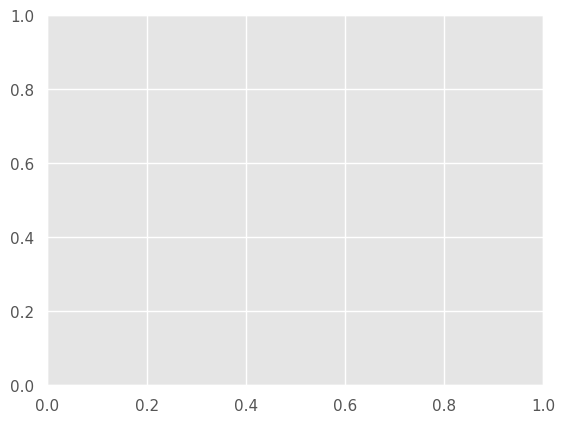

In [90]:
df_R1[['Entidad federativa de residencia habitual de la madre',
              '% de embarazos adolescentes del 2010', 
              '% de embarazos adolescentes del 2012',
              '% de embarazos adolescentes del 2014',
              '% de embarazos adolescentes del 2016',
              '% de embarazos adolescentes del 2018',
              '% de embarazos adolescentes del 2020', '% de la pobreza en el año 2010', '% de la pobreza en el año 2012', '% de la pobreza en el año 2014','% de la pobreza en el año 2016', '% de la pobreza en el año 2018', '% de la pobreza en el año 2020','% de la pobreza en el año 2010','% de la pobreza en el año 2012','% de la pobreza en el año 2014','% de la pobreza en el año 2016','% de la pobreza en el año 2018','% de la pobreza en el año 2020']].plot(x='Entidad federativa de residencia habitual de la madre', type='bars')

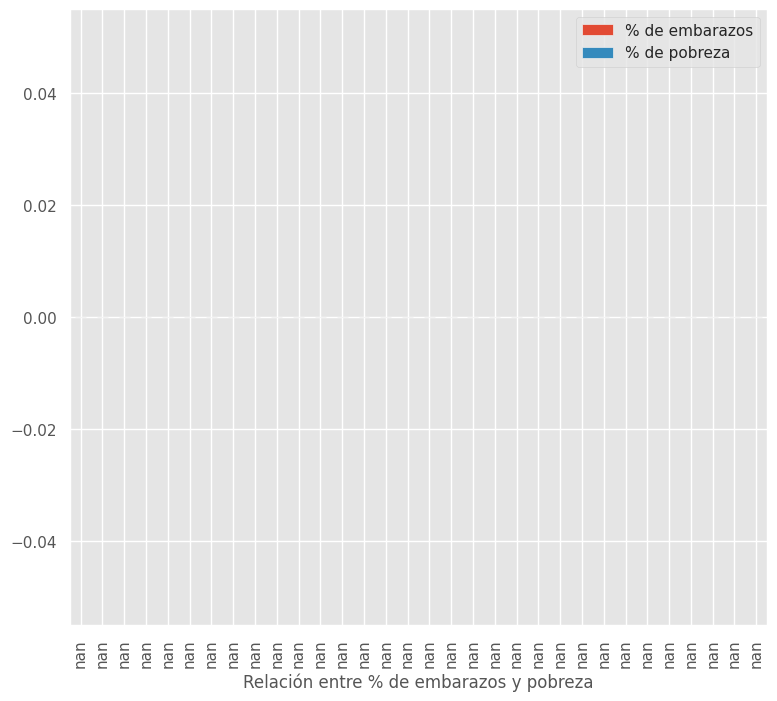

In [ ]:
df_Relaciones=pd.DataFrame(df_R1,columns=["Relación entre % de embarazos y pobreza","% de embarazos","% de pobreza"])
df_Relaciones.plot(x="Relación entre % de embarazos y pobreza", y=["% de embarazos","% de pobreza"], kind="bar",figsize=(9,8))
plt.show()

In [ ]:
df_R1conclusion.to_excel('ConclusionASE.xlsx', sheet_name='ConcluisionASE')

In [94]:
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving ConclusionASE_Pobreza.xlsx to ConclusionASE_Pobreza (1).xlsx


In [95]:
df_Pobrezayembarazo=pd.read_excel("ConclusionASE_Pobreza.xlsx", header=0)
df_Pobrezayembarazo#En esta base de datos lo que podemos observar es la combinación de ambas variables a analizar

,Entidad federativa de residencia habitual de la madre,2010,Unnamed: 2,2012,Unnamed: 4,2014,Unnamed: 6,2016,Unnamed: 8,2018,Unnamed: 10,2020,Unnamed: 12
0,NaN,% de embarazos adolescentes del 2010,% de la pobreza en el año 2010,% de embarazos adolescentes del 2012,% de la pobreza en el año 2012,% de embarazos adolescentes del 2014,% de la pobreza en el año 2014,% de embarazos adolescentes del 2016,% de la pobreza en el año 2016,% de embarazos adolescentes del 2018,% de la pobreza en el año 2018,% de embarazos adolescentes del 2020,% de la pobreza en el año 2020
1,Aguascalientes,18.4,31.520187,18.9,30.209376,19.8,28.597979,17.3,22.604867,18.4,23.598687,15.5,22.510117
2,Baja California,20.3,30.994689,20,30.108835,20,30.262706,18.8,22.88005,18,18.572164,13.3,27.602224
3,Baja California Sur,19.7,50.504995,18.7,44.664153,18.1,43.587797,16.5,45.660192,15.5,48.964296,12.8,50.549147
4,Campeche,20.2,27.810884,19.9,27.925963,20.2,30.171385,18.6,27.055713,17.6,25.507705,13.1,25.617041
5,Coahuila de Zaragoza,21.8,34.692844,23.1,34.41588,22.6,34.345737,21.7,32.533197,20.5,30.41075,17.2,26.693527
6,Colima,19.6,78.483396,19.2,74.687344,19,76.208532,16.5,77.912765,16.8,77.995018,14.9,75.49129
7,Chiapas,18.8,38.806588,19.9,35.254501,20.1,34.390659,18.7,30.701642,18.2,26.642787,17.1,25.304993
8,Chihuahua,23,28.544146,23,28.905748,22.5,28.372344,20.9,26.599855,20.4,29.967806,17.6,32.604471
9,Ciudad de México,16.5,51.574162,16.6,50.056664,15.8,43.464439,13.9,37.193116,12.9,38.787167,9.7,38.691671


In [113]:
df_R1conclusion.rename({'Unnamed: 2': '2010', 'Unnamed: 4': '2012', 'Unnamed: 6': '2014', 'Unnamed: 8': '2016', 'Unnamed: 10': '2018', 'Unnamed: 12':'2020'}, axis=1, inplace=True)
df_R1conclusion#Lo que hacemos en esta parte es nombramos a las columnas que tienen 'Unnamed' con su respectivo nombre 

,2010,2010,2012,2012,2014,2014,2016,2016,2018,2020,2020,2020
Entidad federativa de residencia habitual de la madre,,,,,,,,,,,,
Baja California Sur,19.7,50.504995,18.7,44.664153,18.1,43.587797,16.5,45.660192,15.5,48.964296,12.8,50.549147
Campeche,20.2,27.810884,19.9,27.925963,20.2,30.171385,18.6,27.055713,17.6,25.507705,13.1,25.617041
Coahuila de Zaragoza,21.8,34.692844,23.1,34.41588,22.6,34.345737,21.7,32.533197,20.5,30.41075,17.2,26.693527
Colima,19.6,78.483396,19.2,74.687344,19,76.208532,16.5,77.912765,16.8,77.995018,14.9,75.49129
Chiapas,18.8,38.806588,19.9,35.254501,20.1,34.390659,18.7,30.701642,18.2,26.642787,17.1,25.304993
Chihuahua,23,28.544146,23,28.905748,22.5,28.372344,20.9,26.599855,20.4,29.967806,17.6,32.604471
Ciudad de México,16.5,51.574162,16.6,50.056664,15.8,43.464439,13.9,37.193116,12.9,38.787167,9.7,38.691671
Durango,21.4,48.512294,21.9,44.466644,21.1,46.554997,20.4,39.351096,19.8,41.488129,17.2,42.742389
Guanajuato,17.6,67.570571,18.4,69.696149,18.7,65.218075,17.5,66.828158,17.5,67.890019,14,66.405711


In [ ]:
df_R1conclusion= df_Pobrezayembarazo.set_index('Entidad federativa de residencia habitual de la madre')
df_R1conclusion

,2010,Unnamed: 2,2012,Unnamed: 4,2014,Unnamed: 6,2016,Unnamed: 8,2018,Unnamed: 10,2020,Unnamed: 12
Entidad federativa de residencia habitual de la madre,,,,,,,,,,,,
NaN,% de embarazos adolescentes del 2010,% de la pobreza en el año 2010,% de embarazos adolescentes del 2012,% de la pobreza en el año 2012,% de embarazos adolescentes del 2014,% de la pobreza en el año 2014,% de embarazos adolescentes del 2016,% de la pobreza en el año 2016,% de embarazos adolescentes del 2018,% de la pobreza en el año 2018,% de embarazos adolescentes del 2020,% de la pobreza en el año 2020
Aguascalientes,18.4,31.520187,18.9,30.209376,19.8,28.597979,17.3,22.604867,18.4,23.598687,15.5,22.510117
Baja California,20.3,30.994689,20,30.108835,20,30.262706,18.8,22.88005,18,18.572164,13.3,27.602224
Baja California Sur,19.7,50.504995,18.7,44.664153,18.1,43.587797,16.5,45.660192,15.5,48.964296,12.8,50.549147
Campeche,20.2,27.810884,19.9,27.925963,20.2,30.171385,18.6,27.055713,17.6,25.507705,13.1,25.617041
Coahuila de Zaragoza,21.8,34.692844,23.1,34.41588,22.6,34.345737,21.7,32.533197,20.5,30.41075,17.2,26.693527
Colima,19.6,78.483396,19.2,74.687344,19,76.208532,16.5,77.912765,16.8,77.995018,14.9,75.49129
Chiapas,18.8,38.806588,19.9,35.254501,20.1,34.390659,18.7,30.701642,18.2,26.642787,17.1,25.304993
Chihuahua,23,28.544146,23,28.905748,22.5,28.372344,20.9,26.599855,20.4,29.967806,17.6,32.604471


In [103]:
df_R1conclusion.drop(df_R1conclusion.index[0], inplace=True)
df_R1conclusion

,2010,2010,2012,2012,2014,2014,2016,2016,2018,2020,2020,2020
Entidad federativa de residencia habitual de la madre,,,,,,,,,,,,
Baja California Sur,19.7,50.504995,18.7,44.664153,18.1,43.587797,16.5,45.660192,15.5,48.964296,12.8,50.549147
Campeche,20.2,27.810884,19.9,27.925963,20.2,30.171385,18.6,27.055713,17.6,25.507705,13.1,25.617041
Coahuila de Zaragoza,21.8,34.692844,23.1,34.41588,22.6,34.345737,21.7,32.533197,20.5,30.41075,17.2,26.693527
Colima,19.6,78.483396,19.2,74.687344,19,76.208532,16.5,77.912765,16.8,77.995018,14.9,75.49129
Chiapas,18.8,38.806588,19.9,35.254501,20.1,34.390659,18.7,30.701642,18.2,26.642787,17.1,25.304993
Chihuahua,23,28.544146,23,28.905748,22.5,28.372344,20.9,26.599855,20.4,29.967806,17.6,32.604471
Ciudad de México,16.5,51.574162,16.6,50.056664,15.8,43.464439,13.9,37.193116,12.9,38.787167,9.7,38.691671
Durango,21.4,48.512294,21.9,44.466644,21.1,46.554997,20.4,39.351096,19.8,41.488129,17.2,42.742389
Guanajuato,17.6,67.570571,18.4,69.696149,18.7,65.218075,17.5,66.828158,17.5,67.890019,14,66.405711


In [109]:
r1_2010=df_R1conclusion[[2010, '2010']]
r1_2010

,2010,2010
Entidad federativa de residencia habitual de la madre,,
Baja California Sur,19.7,50.504995
Campeche,20.2,27.810884
Coahuila de Zaragoza,21.8,34.692844
Colima,19.6,78.483396
Chiapas,18.8,38.806588
Chihuahua,23,28.544146
Ciudad de México,16.5,51.574162
Durango,21.4,48.512294
Guanajuato,17.6,67.570571


In [108]:
df_R12K10=pd.DataFrame(r1_2010,columns=["","Age","Height(cm)","Weight(kg)"])
df.plot(x="Name", y=["Age", "Height(cm)", "Weight(kg)"], kind="bar",figsize=(9,8))
plt.show()

KeyError: ignored

In [112]:
plt.figure(figsize=(10, 6))
plt.bar(r1_2010['Entidad federativa de residencia habitual de la madre'], r1_2010[2010], label='2010')
plt.bar(r1_2010['Entidad federativa de residencia habitual de la madre'], r1_2010['2010'], label='2010')
plt.xticks(rotation=90)
plt.legend()
plt.title("Gráfico de barras de las variables 2010 y 2010 para cada entidad federativa de residencia habitual de la madre")
plt.xlabel("Entidad federativa de residencia habitual de la madre")
plt.ylabel("Cantidad")
plt.show()

KeyError: ignored

<Figure size 1000x600 with 0 Axes>